# Hypothesis testing and t-tests

We are going to begin using statistical tests to test hypotheses. To do this we will by using SciPy (scientific python), specifically its submodule stats, which contains many useful functions for statistical analysis.

In [111]:
import scipy.stats as stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('white')

In [2]:
df = pd.read_csv('/Users/fordfishman/GitHub/envs110/python/data/boston_precip_temp.csv')

df.head()

,station,name,date,temp,diurnal_temp_range,precip-total,snow-totals
0,USW00054704,"NORWOOD MEMORIAL AIRPORT, MA US",1,25.9,19.7,3.43,NaN
1,USW00054704,"NORWOOD MEMORIAL AIRPORT, MA US",2,28.9,21.0,3.25,NaN
2,USW00054704,"NORWOOD MEMORIAL AIRPORT, MA US",3,36.4,21.5,4.45,NaN
3,USW00054704,"NORWOOD MEMORIAL AIRPORT, MA US",4,46.8,22.7,4.19,NaN
4,USW00054704,"NORWOOD MEMORIAL AIRPORT, MA US",5,56.4,24.9,3.68,NaN


## Hypothesis testing

In science, research questions drive the data that is collected, and researchers propose hypotheses to answer those questions. We want to make sure that we can claim those hypotheses to be true or false with confidence. We do not want to conclude one thing when the opposite is true. 

In statistics, we state the answers to the research question in terms of a **null hypothesis** and an **alternative hypothesis**. The null hypothesis in general states that there is no effect of our variable of interest. This is our default assumption. The alternative hypothesis is that there is a real effect. 

If there is enough evidence to reject the null hypothesis, we can accept alternate hypothesis, and we can say "There is sufficient evidence to reject the null hypothesis and accept the alternative hypothesis that ..." Otherwise, we cannot. We typically do not say that we accept the null hypothesis; we can say "There is not sufficient evidence to reject the null hypothesis that ..."

To formerly test hypotheses, we can use statistical tests. Today, we will learn about t-tests, a family of statistical tests used to compare means. We discuss 1-sample t-tests, 2-sample t-tests, and paired sample t-tests. 

## 1-sample t-tests and t-statistic

1-sample t-tests are used to see if the mean of a sample is different from some value. Often we are asking if the sample mean is different from 0, but in theory it can be any value. We call the sample mean $\bar{x}$ and the value we are comparing to as $\mu$. 

To compare $\bar{x}$ to $\mu$, we use a statistic, or a metric, called the **t-statistic**. It takes into account $\bar{x}$, $\mu$, sample size, and standard deviation. The larger the t-statistic, the larger the difference between $\bar{x}$ and $\mu$ is, relative to the variance in the sample.

Depending on the type of t-test you do, there are several versions of the t-statistic. The following is the t-statistic for a 1-sample t-test (and the only version we'll be going over explicitly).

$$t = \frac{\bar{x}-\mu}{SE}$$

$$ SE = \frac{\sigma}{\sqrt{N}}$$

SE is the standard error of the mean, which is a measure of how precise the value of your mean is. 

Here, we make a function to calculate the t-statistic from a column of data and a value for $\mu$. 

In [108]:
def t_1sample(data, mu):
    N = len(data)
    mean = np.mean(data)
    std = np.std(data)
    se = std/np.sqrt(N)
    t = (mean - mu)/se
    return t

t_1sample(df['precip-total'], 0)

152.09094876064745

## Type I and II errors, power, and p-values

Like stated above, we do not want to claim that there is a real effect when there is not. Sometimes, due to sampling error, we can observe what we think to be real effect when there is none. This is known as a **false positive**, or a **Type I error**. The opposite can also occur, where there appears to not be a real effect when there is not one. This is a **false negative**, or a **Type II error**. 

We can never truly avoid these errors, but representative sampling and large sample sizes reduce their probability. This increases the **power**, also called statistical power, of our analysis. Power is the probability of detecting an effect if one does exist, and not making a Type II error.

Often, efforts are focused in limiting false positives. Due to inherent bias, researchers are likely to jump to conclusions to defend their hypotheses that expect some effect.  We want to minimize the probability of this occuring. Typically, an acceptable threshold for this probability, or **p-value**, is 0.05, or a 5% chance of a false positive. This is somewhat arbitrary, but considered standard across a wide variety of scientific fields. If our p-value is 0.05 or lower, the phrase "a statistically significant difference" may be used.



For a 1-sample t-test, a p-value represent the probability of observing our t-statistic if the true mean of the population is $\mu$. 

For our example above, the p-value would be the probability of seeing a t-statistic of ~152 if the true mean had been zero. 

The code below runs a 1-sample t-test to see if our sample mean is significantly different from 0. 

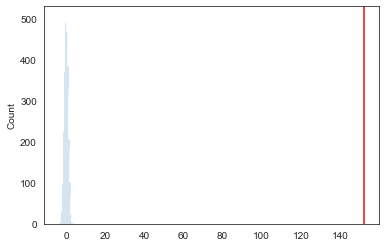

In [112]:
mu = 0
sd = np.std(df['precip-total'])
sample_t = t_1sample(df['precip-total'], mu)
N = len(df['precip-total'])

sample_t_list = list()

for i in range(10000):
    
    samples = np.random.normal(mu, sd, N)
    sample_t_list.append(t_1sample(samples, mu))

sample_t_array = np.array(sample_t_list)


sns.histplot(sample_t_array)
plt.axvline(sample_t, color='red')
plt.show()

We can see that our value of the t-statistic is rather extreme. None of the simulated data we made had t-values quite so large. Based on our simulated data, we can say there is less than 0.01% probability our data came from a normal distribution with a mean of 0 (with our sample st. dev.). 

We can't say there is a zero percent chance, as we only made 10000 simulations. 

In [92]:
greater_than_mean = sample_t_array[(np.abs(sample_t_array)>sample_t)]
print(len(greater_than_mean)/10000)

print('p <', 1/10000)


0.0
p < 0.0001


### Question

Re-run the 1-sample t-test with $\mu=4$. What is the new sample t-statistic? What is the new p-value. Can we reject the null hypothesis that our sample mean is not different from 4?

Then try $\mu = 4.05$. Can we reject the null hypothesis now?

The stats module within Scipy contains a function to conduct a 1-sample t-test so that we don't have to do the math on our own. It returns the sample t-statistic, and the p-value. The t-statistic will be slightly different due to some minor corrections the function is running, but it will not be appreciably different. The p-value will also be different because it is calculated from a theoretical normal distribution, rather than our simulated normal distribution. 

In [118]:
stats.ttest_1samp(df['precip-total'], 0)


Ttest_1sampResult(statistic=151.83725225581998, pvalue=5.1357098948582235e-285)

We can save these values as variables as well.

In [68]:
t, p = stats.ttest_1samp(df['precip-total'], 0)

print('t:', t)
print('p:', p)

t: 151.83725225581998
p: 5.1357098948582235e-285


## 2-tailed tests vs 1-tailed

The default alternative hypothesis in a t-test is that the sample mean is different than $\mu$. Because of this, we look for the possibility of generating a  t-statistic greater in magnitude than ours, looking at both positive and negative values. This is called a **2-tailed** test, because we are examining both tails of the distribution. If our t is in the 95th percentile or greater in magnitude, we can reject the null hypothesis.

If before we look at our data, we suspect our sample mean to be greater than mu (or smaller), we can instead opt for a **1-tailed** test. Here, we only really care about one side of the distribution. If our alternative hypothesis is that the mean is greater than $\mu$, we are asking if our sample t statistic is in the 95th percentile or larger in raw value. On the other hand, if the alternative hypothesis is that the mean is smaller than $\mu$, we are asking if our sample statistic is in 5th percentile or smaller.

We should only run a 1-tailed test if we have prior information that suggests the mean should be larger or smaller. Otherwise, we are at greater risk of a type I error. However, when appropriate, a 1-tailed test increases the power of your t-test.  

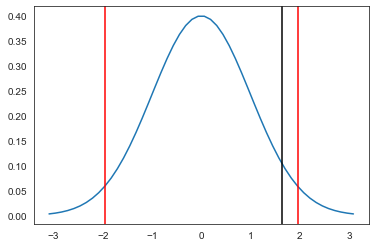

In [120]:
dist = stats.norm(0, 1)
x = np.linspace(dist.ppf(.001), dist.ppf(.999))
y = dist.pdf(x)

x1 = dist.ppf(0.025)
x2 = dist.ppf(0.975)
x3 = dist.ppf(0.95)

sns.lineplot(x=x, y=y)
plt.axvline(x1, color='red')
plt.axvline(x2, color='red')
plt.axvline(x3, color='black')
plt.show()

The default in scipy is to run a 2-tailed test, but we can run a 1-tailed test if appropriate. 

In [69]:
stats.ttest_1samp(df['precip-total'], 0, alternative='two-sided')
stats.ttest_1samp(df['precip-total'], 0, alternative='greater')
stats.ttest_1samp(df['precip-total'], 0, alternative='less')

Ttest_1sampResult(statistic=151.83725225581998, pvalue=1.0)

### 1-sample t-test assumptions

There are some assumptions your data should meet in order to run a 1-sample t-test. 

- Continuous data -> not discrete categories
- The data are a representative random sample
- Data are approximately normally distributed

## 2-sample t-test

Rather than simply asking if a sample mean is truly different from a single value, we can ask if the true means of two groups of data are different from each other. Essentially, is the true difference in means different from zero?

The t-statistic for a 2-sample t-test is different from a 1-sample t-test. It increases in magnitude when the difference between sample means of the two groups increases (relative to their group variances). However, the p-value is generated essentially the same way: what is the probability of seeing our t-value if the true difference between the means of the groups is zero?

The null hypothesis is that true group means are not different. The alternative hypothesis depends on the whether or not your test is 2-tailed or 1-tailed. 

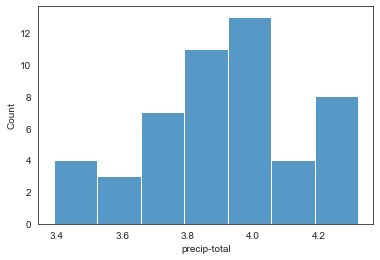

In [114]:
df_summer = df.loc[(df['date']>5) & (df['date']<8),:]
df_winter = df.loc[((df['date']==12) | (df['date']<3)),:]


sns.histplot(df_summer['precip-total'])
plt.show()

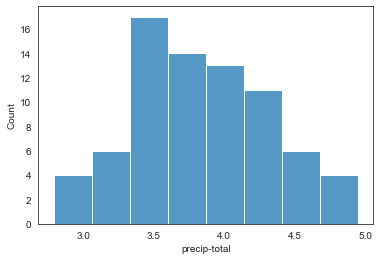

In [115]:
sns.histplot(df_winter['precip-total'])
plt.show()

We can use the scipy function `stats.ttest_ind()`. 

In [72]:
stats.ttest_ind(df_summer['precip-total'], df_winter['precip-total'], alternative='two-sided', nan_policy='omit')

Ttest_indResult(statistic=0.7856253917250791, pvalue=0.433597746869788)

### 2-sample t-test assumptions
- Continuous data -> not discrete categories (same as 1-sample)
- The data are a representative random sample (same as 1-sample)
- Data are approximately normally distributed (same as 1-sample)
- The two groups have similar variances

### Question

Load the gapminder dataset with pandas. Test the hypothesis that average life expectancy is greater in the United States than Mexico. 

In [ ]:
### your code here

## Paired samples t-test

When you have data in two variables, where each observation is measured twice for the same value, and you are comparing the value from the two measurements. 

Paired t-tests eliminate the individual level variation and allows us to focus entirely on the before and after.

The assumptions of a paired samples t-test are the same as a 2-sample t-test, but each observation must have a value for both variables of interest.

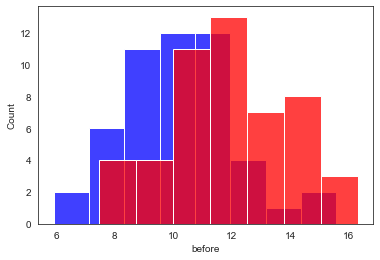

In [117]:
my_paired_samples = {
    'sample_id': list(range(50)),
    'before': np.random.normal(10, 2, 50),
    'after': np.random.normal(12, 2, 50)
}

paired_df = pd.DataFrame(my_paired_samples)

sns.histplot(data=paired_df, x='before', color='blue')
sns.histplot(data=paired_df, x='after', color='red')
plt.show()

The scipy function for a paired t-test is `stats.ttest_rel()`.

In [55]:
stats.ttest_rel(paired_df['before'], paired_df['after'])

Ttest_relResult(statistic=-7.968939666213348, pvalue=2.1313288205552632e-10)

### Question

Create 2 subsets from the gapminder data set, one containing samples from 1900 and the other containing samples from 2000. Using a paired samples t-test to test the hypothesis that mean life expectancy was greater in 2000 than in 1900.

In [ ]:
### your code here